In [4]:
import numpy as np
import pandas as pd 

# Series

In [3]:
s=pd.Series(np.random.randn(5),index=['a','b','c','d','e']) 

In [4]:
s

a    1.012428
b    0.031476
c    0.025890
d   -1.091468
e   -0.472691
dtype: float64

In [5]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [6]:
d={'b':1,
  'a':0,
  'c':2}

In [7]:
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [8]:
pd.Series(d,index=['b','c','d','a']) 

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [9]:
pd.Series(5.0,index=['a','b','c','d','e']) 

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [10]:
s[0]

1.0124282495211872

In [11]:
s[:3]

a    1.012428
b    0.031476
c    0.025890
dtype: float64

In [12]:
s[s>s.median()]

a    1.012428
b    0.031476
dtype: float64

In [14]:
s[[4,3,1]]

e   -0.472691
d   -1.091468
b    0.031476
dtype: float64

In [15]:
np.exp(s)

a    2.752276
b    1.031976
c    1.026228
d    0.335723
e    0.623323
dtype: float64

In [16]:
s.array

<PandasArray>
[  1.0124282495211872,  0.03147576257593732, 0.025890106960487956,
  -1.0914683262489626, -0.47269055077043026]
Length: 5, dtype: float64

In [17]:
s.to_numpy()

array([ 1.01242825,  0.03147576,  0.02589011, -1.09146833, -0.47269055])

In [18]:
s['a']

1.0124282495211872

In [19]:
s['e']=12

In [20]:
s

a     1.012428
b     0.031476
c     0.025890
d    -1.091468
e    12.000000
dtype: float64

In [21]:
'e' in s

True

In [22]:
s.get('a')

1.0124282495211872

In [23]:
s.get('e') 

12.0

In [24]:
s=pd.Series(np.random.randn(5),name='something')

In [25]:
s

0    0.057142
1    0.608305
2   -0.515683
3   -0.215541
4    0.938763
Name: something, dtype: float64

In [26]:
s.name

'something'

In [27]:
s2=s.rename('differen')

In [28]:
s2.name

'differen'

# DataFrame

In [25]:
d={
    'one':pd.Series([1.0,2.0,3.0],index=['a','b','c']),
    'two':pd.Series([1.0,2.0,3.0,4.0],index=['a','b','c','d']) 
}

In [26]:
df=pd.DataFrame(d)

In [32]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [33]:
pd.DataFrame(d,index=['d','b','a']) 

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [34]:
pd.DataFrame(d,index=['d','b','a'],columns=['two','three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [35]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [36]:
df.columns

Index(['one', 'two'], dtype='object')

# From dict of ndarrays/lists

In [37]:
d={
    'one':[1.0,2.0,3.0,4.0],
    'two':[4.0,3.0,2.0,1.0]
}

In [38]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [39]:
pd.DataFrame(d,index=['a','b','c','d']) 

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


# From structured or record array

In [21]:
data=np.zeros((2,),dtype=[('A','i4'),('B','f4'),('C','a10')])

In [45]:
data[:]=[(1, 2.0, "Hello"), (2, 3.0, "World")]

In [46]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [47]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [48]:
pd.DataFrame(data,columns=['C','A','B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


# From a list dicts

In [49]:
data2=[{
    'a':1,
    'b':2
},{
    'a':5,
    'b':10,
    'c':20
}]

In [50]:
data2

[{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [51]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [52]:
pd.DataFrame(data2,columns=['a','b']) 

,a,b
0,1,2
1,5,10


# From a dict of tuples

In [53]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

# From a list of namedtuples

In [5]:
from collections import namedtuple

In [6]:
Point=namedtuple('Point','x y')

In [7]:
pd.DataFrame([Point(0,0),Point(0,3),(2,3)])

,x,y
0,0,0
1,0,3
2,2,3


In [8]:
Point3D=namedtuple('Point3D','x y z')

In [9]:
pd.DataFrame([Point3D(0,0,0),Point3D(0,3,5),Point(2,3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


# From a list of dataclass

In [14]:
from dataclasses import make_dataclass

In [15]:
Point=make_dataclass('Point',[('x','int'),('y',int)])

In [16]:
Point

types.Point

In [17]:
pd.DataFrame([Point(0,0),Point(0,3),Point(2,3)])

,x,y
0,0,0
1,0,3
2,2,3


# Alternate constructors

In [18]:
pd.DataFrame.from_dict(dict([('A',[1,2,3]),('B',[4,5,6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [19]:
pd.DataFrame.from_dict(dict([('A',[1,2,3]),('B',[4,5,6])]),
                      orient='index',
                      columns=['one','two','three'])

,one,two,three
A,1,2,3
B,4,5,6


In [22]:
data 

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [23]:
pd.DataFrame.from_records(data,index='C')

,A,B
C,,
b'',0,0.0
b'',0,0.0


# Column selection, addition, deletion

In [27]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [28]:
df['three']=df['one']*df['two']

In [29]:
df['flag']=df['one']>2

In [30]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [34]:
del df['two']

In [35]:
three=df.pop('three')

In [36]:
three

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

In [37]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [38]:
df['foo']='bar'

In [39]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [40]:
df['one_trunc']=df['one'][:2]

In [41]:
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [47]:
df.insert(0,'ba',df['one']) ## first postion, second existing column, third existing column

In [48]:
df

,ba,one,bar,flag,foo,one_trunc
a,1.0,1.0,1.0,False,bar,1.0
b,2.0,2.0,2.0,False,bar,2.0
c,3.0,3.0,3.0,True,bar,NaN
d,NaN,NaN,NaN,False,bar,NaN


In [49]:
del df['ba']

In [50]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


# Assigning new columns in method chains

In [57]:
from sklearn import datasets

In [64]:
iris=datasets.load_iris()

In [72]:
irisDf=pd.DataFrame(iris.data)

In [74]:
irisDf['class']=iris.target

In [76]:
irisDf.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','class']

In [77]:
irisDf.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [78]:
irisDf.assign(SepalRatio=irisDf['SepalWidth']/irisDf['SepalLength']).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,class,SepalRatio
0,5.1,3.5,1.4,0.2,0,0.686275
1,4.9,3.0,1.4,0.2,0,0.612245
2,4.7,3.2,1.3,0.2,0,0.680851
3,4.6,3.1,1.5,0.2,0,0.673913
4,5.0,3.6,1.4,0.2,0,0.720000


In [80]:
irisDf.assign(SepalRation=lambda x:(x['SepalWidth']/x['SepalLength'])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,class,SepalRation
0,5.1,3.5,1.4,0.2,0,0.686275
1,4.9,3.0,1.4,0.2,0,0.612245
2,4.7,3.2,1.3,0.2,0,0.680851
3,4.6,3.1,1.5,0.2,0,0.673913
4,5.0,3.6,1.4,0.2,0,0.720000


<AxesSubplot:xlabel='SepalRatio', ylabel='PetalRatio'>

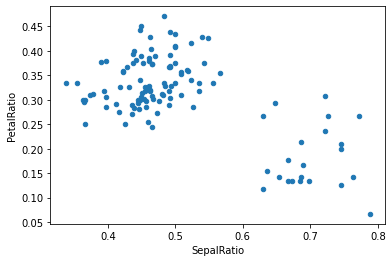

In [81]:
(irisDf.query('SepalLength>5').assign(
    SepalRatio=lambda x: x.SepalWidth/x.SepalLength,
    PetalRatio=lambda x: x.PetalWidth/x.PetalLength,
)
 .plot(kind='scatter',x='SepalRatio',y='PetalRatio')
)

In [82]:
dfa=pd.DataFrame({
    'A':[1,2,3],
    'B':[4,5,6]
})

In [83]:
dfa.assign(C=lambda x: x['A']+x['B'],
          D=lambda x: x['A']+x['C'])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


# Indexing/Selection

In [85]:
df.loc['b'] 

one            2.0
bar            2.0
flag         False
foo            bar
one_trunc      2.0
Name: b, dtype: object

In [86]:
df.iloc[2]

one           3.0
bar           3.0
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

# Data alignment and arithmetic

In [88]:
df=pd.DataFrame(np.random.randn(10,4),columns=['A','B','C','D'])

In [90]:
df2=pd.DataFrame(np.random.randn(7,3),columns=['A','B','C'])

In [91]:
df+df2

,A,B,C,D
0,1.881190,-0.417671,1.127413,NaN
1,0.787110,-0.454812,0.911874,NaN
2,0.219681,-1.825554,1.533971,NaN
3,-1.325717,0.664608,1.002004,NaN
4,-1.482980,-0.182151,0.415464,NaN
5,-0.517192,1.786473,0.365236,NaN
6,0.316427,1.158310,-0.175532,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [92]:
df-df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.389191,-2.088211,-0.980801,1.976154
2,-1.416480,-2.857543,0.808684,1.450523
3,-1.864814,-0.322356,-0.320334,0.994154
4,-0.471783,-1.305439,-0.895812,2.310846
5,-2.776117,-1.912614,0.057833,1.479554
6,-0.605607,-0.422455,-1.948341,1.414663
7,-3.274774,-2.852572,-0.390521,1.382960
8,-0.866098,-0.467092,-0.068954,0.555142
9,-0.737715,-1.348841,-0.101110,0.433899


In [93]:
df*5+2

,A,B,C,D
0,8.585503,7.096175,3.579859,-4.589414
1,6.639549,-3.344883,-1.324145,5.291354
2,1.503104,-7.191539,7.623280,2.663202
3,-0.738569,5.484395,1.978187,0.381357
4,6.226586,0.568979,-0.899203,6.964815
5,-5.295083,-2.466896,3.869024,2.808358
6,5.557466,4.983898,-6.161844,2.483901
7,-7.788367,-7.166686,1.627252,2.325385
8,4.255011,4.760717,3.235089,-1.813702
9,4.896929,0.351969,3.074308,-2.419918


In [94]:
1/df

,A,B,C,D
0,0.759243,0.981128,3.164839,-0.758793
1,1.077691,-0.935474,-1.504146,1.519132
2,-10.062473,-0.543979,0.889161,7.539186
3,-1.825771,1.434969,-229.219691,-3.089007
4,1.182988,-3.494010,-1.724612,1.007087
5,-0.685393,-1.119345,2.675193,6.185377
6,1.405495,1.675661,-0.612607,10.332694
7,-0.510810,-0.545453,-13.413884,15.366411
8,2.217284,1.811124,4.048292,-1.311062
9,1.725965,-3.033923,4.654160,-1.131243


In [95]:
df**4

,A,B,C,D
0,3.009371,1.079188,9.967663e-03,3.016527
1,0.741349,1.305788,1.953619e-01,0.187767
2,0.000098,11.420178,1.599849e+00,0.000310
3,0.089994,0.235846,3.622366e-10,0.010983
4,0.510598,0.006710,1.130405e-01,0.972148
5,4.531489,0.637006,1.952448e-02,0.000683
6,0.256261,0.126840,7.100242e+00,0.000088
7,14.687941,11.297165,3.088743e-05,0.000018
8,0.041373,0.092941,3.723168e-03,0.338460
9,0.112686,0.011803,2.131252e-03,0.610628


In [96]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)

In [97]:
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)

In [98]:
df1&df2

,a,b
0,False,False
1,False,True
2,True,False


In [99]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [100]:
df1^df2

,a,b
0,True,True
1,True,False
2,False,True


In [101]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


# Transposing

In [103]:
df[:5].T

,0,1,2,3,4
A,1.317101,0.927910,-0.099379,-0.547714,0.845317
B,1.019235,-1.068977,-1.838308,0.696879,-0.286204
C,0.315972,-0.664829,1.124656,-0.004363,-0.579841
D,-1.317883,0.658271,0.132640,-0.323729,0.992963


# DataFrame interoperability with numpy functions

In [105]:
np.exp(df)

,A,B,C,D
0,3.732583,2.771074,1.371592,0.267701
1,2.529217,0.343360,0.514361,1.931450
2,0.905399,0.159086,3.079158,1.141839
3,0.578270,2.007478,0.995647,0.723447
4,2.328717,0.751109,0.559988,2.699221
5,0.232465,0.409270,1.453253,1.175474
6,2.037031,1.816260,0.195466,1.101618
7,0.141187,0.159879,0.928161,1.067241
8,1.569885,1.736972,1.280202,0.466387
9,1.784942,0.719207,1.239690,0.413134


In [106]:
np.asarray(df)

array([[ 1.31710051,  1.0192349 ,  0.31597181, -1.31788286],
       [ 0.92790977, -1.06897656, -0.66482904,  0.6582708 ],
       [-0.09937915, -1.83830773,  1.12465606,  0.13264032],
       [-0.54771389,  0.69687897, -0.00436263, -0.32372863],
       [ 0.84531728, -0.28620412, -0.57984051,  0.99296307],
       [-1.45901657, -0.89337924,  0.37380481,  0.16167164],
       [ 0.71149325,  0.59677952, -1.6323688 ,  0.09678018],
       [-1.95767337, -1.83333727, -0.07454962,  0.06507701],
       [ 0.45100222,  0.55214332,  0.24701775, -0.76274046],
       [ 0.57938586, -0.32960626,  0.21486154, -0.88398353]])

In [107]:
ser=pd.Series([1,2,3,4])

In [108]:
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

# DataFrame column attributes access and ipython completion

In [110]:
df = pd.DataFrame({"foo1": np.random.randn(5), "foo2": np.random.randn(5)})

In [111]:
df.foo1

0   -1.862074
1    2.042258
2    1.274371
3    0.083703
4   -1.332872
Name: foo1, dtype: float64